# 251217 - Main Quest 03

In [121]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [122]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [123]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: /Users/ichangyu/.cache/kagglehub/datasets/tunguz/online-retail/versions/1


(541909, 8)

In [124]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [126]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [127]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek 

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/var/folders/47/qvf6ns_n0xbb_s77tyz4nmbm0000gn/T/ipykernel_38919/1081212069.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [128]:
df["DayOfWeek"].value_counts()

DayOfWeek
3    103857
1    101808
0     95111
2     94565
4     82193
6     64375
Name: count, dtype: int64

## 1. 모집단과 표본 집단의 TotalPrice 비교

-------------- 표본 평균과 표준편차 --------------
표본평균 : 16.83
표본 표준편차: 64.47
----------- 전체 데이터셋 평균과 표준편차 -----------
전체 데이터셋 평균 : 17.99
전체 데이터셋 표준편차: 378.81


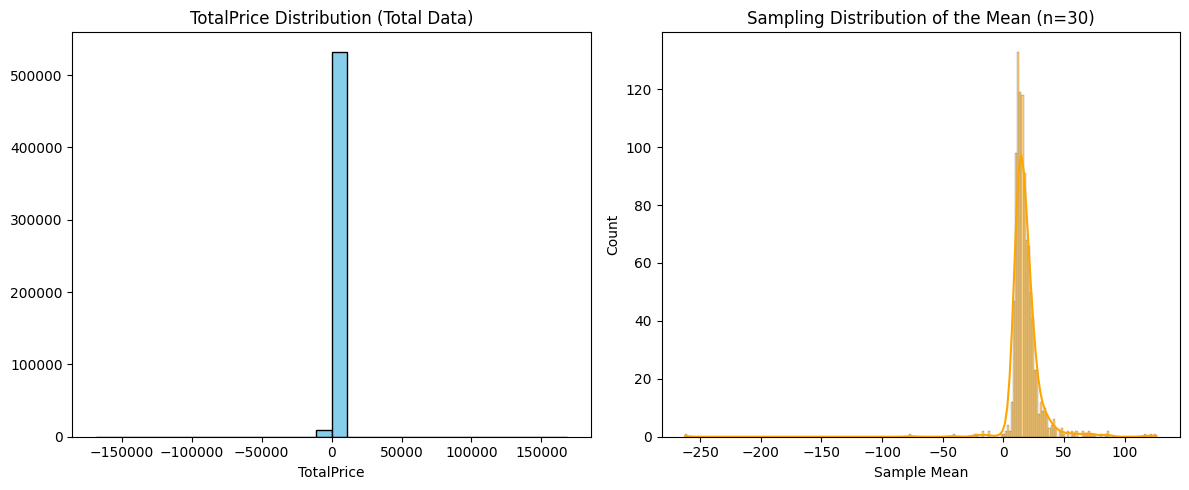

In [129]:
# 데이터셋에서 무작위로 1000개의 표본 추출
sample_df = df.sample(n=1000, random_state=42)

# 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차 비교
sample_mean = sample_df['TotalPrice'].mean()
sample_std = sample_df['TotalPrice'].std()

df_mean = df['TotalPrice'].mean()
df_std = df['TotalPrice'].std()

print("-------------- 표본 평균과 표준편차 --------------")
print(f"표본평균 : {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")

print("----------- 전체 데이터셋 평균과 표준편차 -----------")
print(f"전체 데이터셋 평균 : {df_mean:.2f}")
print(f"전체 데이터셋 표준편차: {df_std:.2f}")

# 중심극한정리를 사용해 모집단과 표본의 차이 설명

# 표본 크기와 반복 횟수 설정
sample_size = 30  
n_trials = 1000   
sample_means = []

for _ in range(n_trials):
    sample = df["TotalPrice"].sample(n=sample_size)
    sample_means.append(sample.mean())

# 시각화
plt.figure(figsize=(12, 5))

# 모집단 분포 (원래 데이터)
plt.subplot(1, 2, 1)
plt.hist(df['TotalPrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('TotalPrice Distribution (Total Data)')
plt.xlabel('TotalPrice')

# 표본 평균의 분포 (이것이 정규분포여야 함)
plt.subplot(1, 2, 2)
sns.histplot(sample_means, kde=True, color='orange')
plt.title(f'Sampling Distribution of the Mean (n={sample_size})')
plt.xlabel('Sample Mean')
plt.tight_layout()
plt.show()

- **중심극한정리**에 따르면, **모집단의 분포 모양**과는 관계없이 추출된 **표본평균**의 분포가 **정규분포**에 가까워진다. 
- 이는 표본의 크기($n$)가 커질수록 그 평균들의 분포가 더욱 완벽한 정규분포 형태를 띠게 됨을 의미한다.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증

In [130]:
df["Country"].value_counts() # 영국 다음으로 독일이 가장 주문이 많다.

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [131]:
# 독립표본 t-검정을 사용해 두 국가(영국, 독일)간 'TotalPrice' 평균 차이가 통계적으로 유의미한지 검증
uk_data = df[df["Country"] == "United Kingdom"]["TotalPrice"]
germany_data = df[df["Country"] == "Germany"]["TotalPrice"]

levene_stat, levene_p = stats.levene(uk_data, germany_data)
print(f"Levene 검정 결과: {levene_stat:.4f}, {levene_p:.4f}\n")

## 등분산성 검정 -> 기각 시 Welch's t-검정 수행, 만족 시 독립표본 t-검정 수행
if levene_p < 0.05:
    print("등분산 가정이 기각되었습니다. (웰치스 t-검정 수행)\n")
    t_stat, p_val = stats.ttest_ind(uk_data, germany_data, equal_var=False)
else:
    print("등분산 가정이 만족됩니다. (독립표본 t-검정 수행)\n")
    t_stat, p_val = stats.ttest_ind(uk_data, germany_data, equal_var=True)
print(f"t-statistic: {t_stat:.4f}\n")
print(f"p-value: {p_val:.4f}\n")

## 유의확률 비교
alpha = 0.05
if p_val < alpha:
    print("결과: 두 국가 간 TotalPrice 평균 차이는 통계적으로 유의미합니다.")
else:
    print("결과: 두 국가 간 TotalPrice 평균 차이는 통계적으로 유의미하지 않습니다.")


Levene 검정 결과: 0.2566, 0.6125

등분산 가정이 만족됩니다. (독립표본 t-검정 수행)

t-statistic: -1.6839

p-value: 0.0922

결과: 두 국가 간 TotalPrice 평균 차이는 통계적으로 유의미하지 않습니다.


In [132]:
# 실제 독일의 가격이 영국보다 높을까?
print(f"영국의 평균 가격: {uk_data.mean():.4f}")
print(f"독일의 평균 가격: {germany_data.mean():.4f}")

영국의 평균 가격: 16.5251
독일의 평균 가격: 23.3489


- 이를 통해 우리는 귀무가설이 옳다고 했지만, 실제로는 대립가설이 옳았기 때문에 2종 오류를 범했다.

## 3. 주중, 주말에 따라 발생하는 UnitPrice의 분포 변화 확인

            count      mean         std       min   25%   50%   75%       max
DayType                                                                      
Weekday  477534.0  4.843425  103.032058 -11062.06  1.25  2.10  4.13  38970.00
Weekend   64375.0  2.887824    7.959497      0.00  1.25  1.85  3.75   1236.75


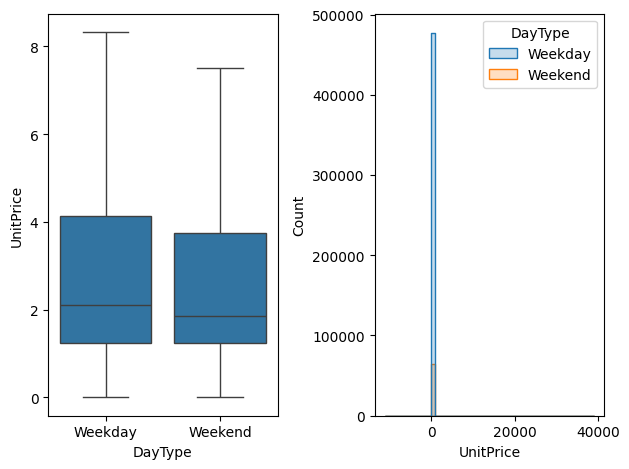

In [133]:
# 주중(0~4) / 주말(5~6) 구분
# 0: Mon, 1: Tue, ..., 5: Sat, 6: Sun
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 기초 통계량 확인
stats_df = df.groupby('DayType')['UnitPrice'].describe()
print(stats_df)

# 상자수염그림(boxplot)
plt.subplot(1,2,1)
sns.boxplot(x='DayType', y='UnitPrice', data=df, showfliers=False, order=['Weekday', 'Weekend'])

plt.subplot(1,2,2)
sns.histplot(data=df, x='UnitPrice', hue='DayType', element="step", common_norm=False, bins=50)
plt.tight_layout()
plt.show()

- UnitPrice 데이터는 보통 가격이 낮은 상품이 대다수이고, 소수의 매우 비싼 상품(이상치)이 존재하여 이상치를 제거했다. (showfliers=False)
- 주중과 주말의 UnitPrice가 크게 차이가 없으며, 주중이 주말보다 약간 더 비싸게 판매되었다. 

## 상품의 단가(Unitprice)와 판매 국가(Country), 판매 날짜(DayType)를 이용해 판매 수량(Quantity)을 예측하는 회귀 모델

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
 11  DayType       541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(5)
memory usage: 45.5+ MB


In [135]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795,2.431277,7.553128
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000,0.000000,1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000,1.000000,5.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000,2.000000,8.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000
std,218.081158,NaN,96.759853,1713.600303,378.810824,1.844709,3.509055


In [136]:
# 전처리: 반품 제거 및 이상치 일부 제거 
df_clean = df[(df['Quantity'] > 0) & (df['Quantity'] < 10000)]

# 원-핫 인코딩
df_encoded = pd.get_dummies(df_clean, columns=['Country'], drop_first=True)

country_cols = [col for col in df_encoded.columns if col.startswith('Country_')]
features = ['UnitPrice', 'DayOfWeek'] + country_cols
X = df_encoded[features]
y = df_encoded['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-----------------------회귀계수 목록-----------------------")
print(model.coef_,"\n")

print("-----------------------평가지표-----------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

-----------------------회귀계수 목록-----------------------
[-9.93326374e-03 -1.94606511e-01 -5.89444689e+01 -5.25822925e+01
 -5.99251102e+01 -5.93831228e+01 -5.66569490e+01 -5.81782264e+01
 -6.11072507e+01 -3.91366925e+01 -5.02694649e+01 -5.21663832e+01
 -6.19494601e+01 -5.58026670e+01 -5.79795847e+01 -5.80396939e+01
 -6.05196784e+01 -5.43965026e+01 -5.76091391e+01 -5.54444879e+01
 -6.04006374e+01  9.02221407e+00 -6.24261711e+01 -5.24765816e+01
 -6.29013288e+01  1.53595255e+01 -5.31579394e+01 -5.92113131e+01
 -6.04469740e+01 -6.50878838e+01 -6.10472037e+01 -4.52658348e+01
 -5.97052679e+01  9.15084383e+00 -5.57306601e+01 -5.75494576e+01
 -5.77942792e+01 -6.17747323e+01 -6.38835946e+01] 

-----------------------평가지표-----------------------
Mean Squared Error (MSE): 1534.26
R-squared (R^2): 0.03


- 회귀계수가 0.03, 평균 제곱 오차가 1534.26로 매우 낮은 성능을 보인다.
- 종속변수를 설명하는 독립변수가 부족하고, 이상치를 제거했지만, 여전히 독립변수로 사용된 변수들이 종속변수와의 선형관계가 매우 약하다는 뜻이다.
- 따라서 다른 방법을 고안해야 한다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델링

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# 필요한 데이터 정리, 결측치와 이상치 제거
## 인코딩된 Country 컬럼을 독립변수로 추가
country_cols = [col for col in df.columns if col.startswith('Country_')]

## IsReturn 피처 엔지니어링
df["IsReturn"] = df["Quantity"].apply(lambda x: 1 if x < 0 else 0)
df["IsReturn"].value_counts() # 반품 비율이 굉장히 높음 -> 이것을 예측하는 로지스틱 회귀 모델링 목표

## 모델 학습에 필요한 컬럼 : TotalPrice, DayOfWeek, InvoiceMonth
X = df[["TotalPrice", "DayOfWeek", "InvoiceMonth"] + country_cols]
y = df["IsReturn"]

## 모델정의가 교차검증보다 먼저 이루어져야 한다.
model = LogisticRegression(class_weight={0: 1, 1: 10})

## 교차검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
print(f"교차 검증 평균 F1 점수: {cv_scores.mean():.4f}")

## 학습데이터 분할 및 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n[분류 모델 성능 보고서]")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

교차 검증 평균 F1 점수: 0.9350

[분류 모델 성능 보고서]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106226
           1       0.97      0.92      0.94      2156

    accuracy                           1.00    108382
   macro avg       0.98      0.96      0.97    108382
weighted avg       1.00      1.00      1.00    108382

Confusion Matrix:
[[106158     68]
 [   181   1975]]


- 1번째 결과 : 결정계수가 0.61로 약 61%의 예측능력을 가진 모델링이 되었음.
- 2번째 결과 : Country 컬럼을 독립변수로 추가해 결정계수를 0.63로 향상시켰음.
- 3번째 결과 : 회귀문제에서의 평가지표는 결정계쑤가 아닌 F1 Score를 사용해야 한다.
실제 반품이 발생한 사건에 대해 모두 반품이라고 올바르게 판단(precision = 1.00)했으나, 모델이 반품을 예측한 데이터의 64%만이 실제로 반품된 것임을 확인(recall = 0.64)할 수 있었다.
```
교차 검증 평균 F1 점수: 0.7532

[분류 모델 성능 보고서]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    106226
           1       0.64      1.00      0.78      2156

    accuracy                           0.99    108382
   macro avg       0.82      0.99      0.89    108382
weighted avg       0.99      0.99      0.99    108382

Confusion Matrix:
[[105034   1192]
 [     0   2156]]
```
- 4번째 결과 : 클래스 불균형 파라미터 비율로 가장 적절한 값을 구하기 위해 GridSearch를 통한 하이퍼파라미터 튜닝을 진행하였다. 그 결과 F1 점수를 0.78 -> 0.94로 향상시켰다. 또한 약간의 precision 감소를 피하진 못했으나, 이전 결과에 비해 recall이 향상되었다.
```
교차 검증 평균 F1 점수: 0.9350

[분류 모델 성능 보고서]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106226
           1       0.97      0.92      0.94      2156

    accuracy                           1.00    108382
   macro avg       0.98      0.96      0.97    108382
weighted avg       1.00      1.00      1.00    108382

Confusion Matrix:
[[106158     68]
 [   181   1975]]
```